<a href="https://colab.research.google.com/github/cesarpastrana806-lab/Programacion-orentada-a-objetodos/blob/main/unidad5/Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Abre un cuadro de diálogo para seleccionar el archivo desde tu computadora
uploaded = files.upload()


Saving grupo2.csv to grupo2.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr

# Cargamos el archivo del grupo 2
G2 = pd.read_csv('grupo2.csv')
G2.head()



,HorasEstudio,Calificacion
0,3.79,40.0
1,6.08,26.1
2,7.17,29.0
3,7.54,31.9
4,8.18,34.8


In [4]:
G2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HorasEstudio  50 non-null     float64
 1   Calificacion  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [5]:
# Mostramos la hora maxima de estudio
G2.HorasEstudio.max()

20.0

In [6]:
# Mostramos la hora minima de estudio
G2.HorasEstudio.min()

3.79

In [7]:
# Mostramos la calificacion maxima (mas alta)
G2.Calificacion.max()

99.0

In [8]:
# Mostramos la calificacion minima (mas baja)
G2.Calificacion.min()

26.1

In [9]:
# Mostrar los estadisticos descriptivos de la columna HorasEstudio
G2.HorasEstudio.describe()

,HorasEstudio
count,50.000000
mean,14.352000
std,4.219174
min,3.790000
25%,12.032500
50%,14.600000
75%,17.715000
max,20.000000


In [10]:
# Mostrar los estadisticos descriptivos de la columna Calificacion
G2.Calificacion.describe()

,Calificacion
count,50.000000
mean,75.912000
std,20.668922
min,26.100000
25%,63.500000
50%,78.550000
75%,93.300000
max,99.000000


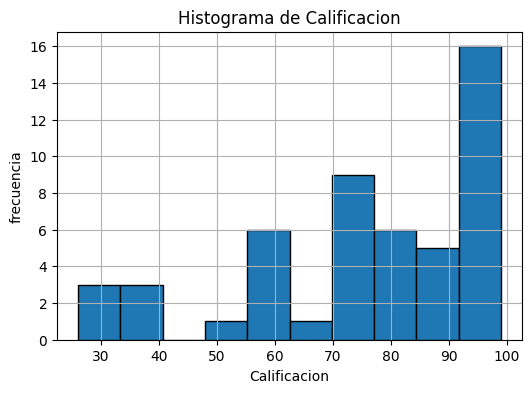

In [11]:
# Histograma de calificaciones
plt.figure(figsize=(6, 4))
plt.hist(G2.Calificacion, bins = 10, edgecolor = 'black')
plt.title('Histograma de Calificacion')
plt.xlabel('Calificacion')
plt.ylabel('frecuencia')
plt.grid(True)
plt.show()

Pendiente (m): 4.22
Intercepto (b): 15.31
Coeficiente de determinacion (R^2): 0.74
Ecuacion de Regresion: Y = 4.22 * (Horas de Estudio) + 15.31
($R2=0.74$)


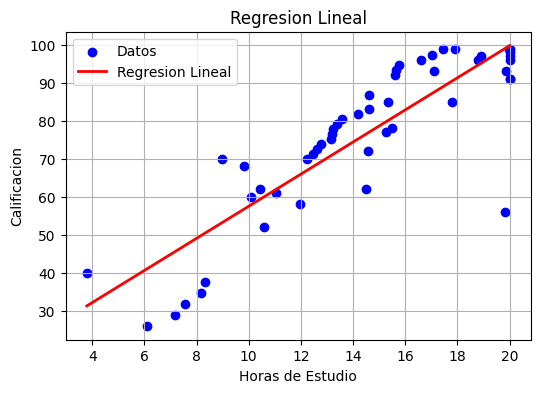

In [12]:
X = G2["HorasEstudio"].values.reshape(-1, 1)
Y = G2["Calificacion"].values

modelo = LinearRegression()
modelo.fit(X, Y)

pendiente = modelo.coef_[0]
intercepto = modelo.intercept_
r_cuadrado = modelo.score(X, Y)
prediccion = modelo.predict(X)

print(f"Pendiente (m): {pendiente:.2f}")
print(f"Intercepto (b): {intercepto:.2f}")
print(f"Coeficiente de determinacion (R^2): {r_cuadrado:.2f}")
print(f"Ecuacion de Regresion: Y = {pendiente:.2f} * (Horas de Estudio) + {intercepto:.2f}\n($R2={r_cuadrado:.2f}$)")

plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='blue', label='Datos')
plt.plot(X, prediccion, color='red', linewidth=2, label='Regresion Lineal')
plt.title('Regresion Lineal')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificacion')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
coeficiente_correlacion, p_valor = pearsonr(X.flatten(), Y)
print(f"Coeficiente de correlacion de Pearson:", coeficiente_correlacion)
print("Valor p:", p_valor)

Coeficiente de correlacion de Pearson: 0.861989042650508
Valor p: 9.077714233687994e-16
